Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best parameters for KNeighbors: {'n_neighbors': 7, 'weights': 'distance'}

Evaluating RandomForest...


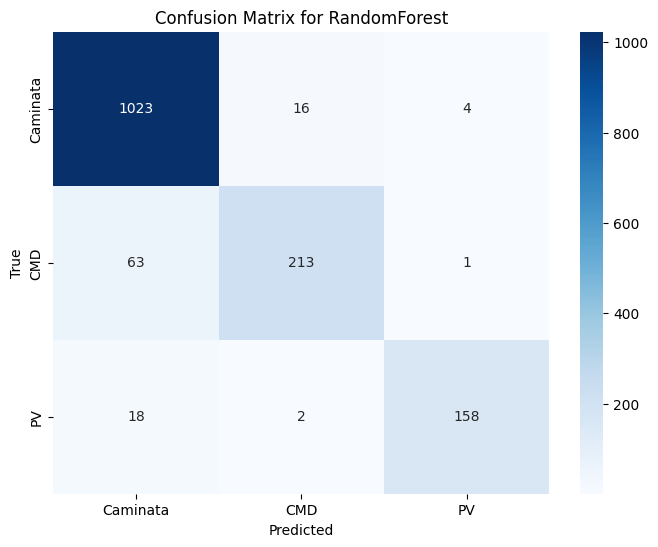

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1043
           1       0.92      0.77      0.84       277
           2       0.97      0.89      0.93       178

    accuracy                           0.93      1498
   macro avg       0.94      0.88      0.91      1498
weighted avg       0.93      0.93      0.93      1498


Evaluating SVM...


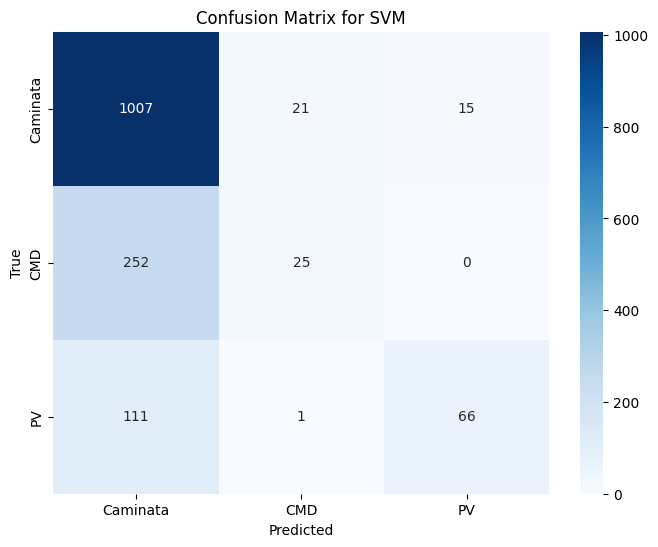

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.74      0.97      0.83      1043
           1       0.53      0.09      0.15       277
           2       0.81      0.37      0.51       178

    accuracy                           0.73      1498
   macro avg       0.69      0.48      0.50      1498
weighted avg       0.71      0.73      0.67      1498


Evaluating KNeighbors...


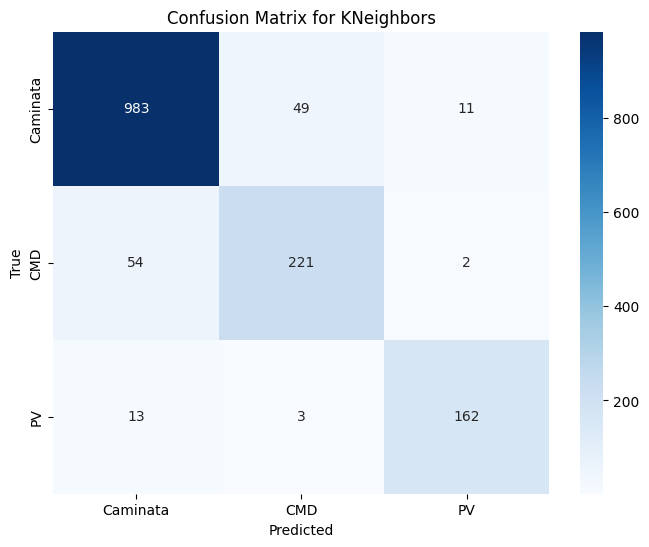

Classification Report for KNeighbors:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1043
           1       0.81      0.80      0.80       277
           2       0.93      0.91      0.92       178

    accuracy                           0.91      1498
   macro avg       0.89      0.88      0.89      1498
weighted avg       0.91      0.91      0.91      1498


Feature Importances for RandomForest:
    Feature  Importance
5  z_data_2    0.177663
1  y_data_1    0.175280
3  x_data_2    0.174922
0  x_data_1    0.161711
4  y_data_2    0.156553
2  z_data_1    0.153870


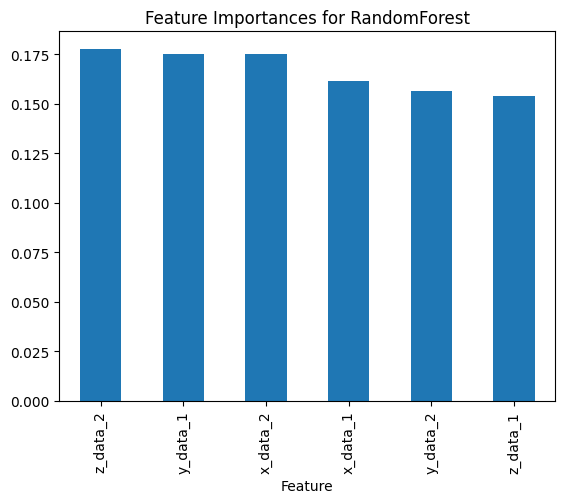

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Cargar los datos
file_path = 'C:/Users/Aldahir/Desktop/TESIS 2/data_20240825_115317.csv'
file2 = 'C:/Users/Aldahir/Desktop/TESIS 2/data_20240828_220829.csv'
file3 = 'C:\\Users\\Aldahir\\Desktop\\TESIS 2\\data_20240828_221202.csv' 
file4 = 'C:/Users/Aldahir/Desktop/TESIS 2/data_20240828_221819.csv'
file5 = 'C:\\Users\\Aldahir\\Desktop\\TESIS 2\\data_20240828_222607.csv'
# Cargar los datos
df = pd.read_csv(file_path)
df2 = pd.read_csv(file2)
df3= pd.read_csv(file3)
df5 = pd.read_csv(file4)
df6= pd.read_csv(file5)

data = pd.concat([df,df2,df3,df5,df6])  # Reemplaza con la ruta correcta de tu archivo

# 2. Preprocesamiento de datos
# Eliminar cualquier columna no necesaria, si es que existe
data = data.drop(columns=['timestamp'])  # Ejemplo de eliminación de columna de timestamp si no es relevante

# Separar características (features) y etiquetas (labels)
X = data.drop(columns=['current_label'])  # Características
y = data['current_label']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Entrenamiento de modelos y afinación
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNeighbors': KNeighborsClassifier()
}

# Parámetros para la búsqueda en malla (Grid Search)
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

best_estimators = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# 4. Evaluación de los mejores modelos
for model_name, model in best_estimators.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    
    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Caminata', 'CMD', 'PV'], yticklabels=['Caminata', 'CMD', 'PV'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Mostrar el reporte de clasificación
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# 5. Importancia de las características para Random Forest
if 'RandomForest' in best_estimators:
    rf = best_estimators['RandomForest']
    importances = rf.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Mostrar las características más importantes
    print("\nFeature Importances for RandomForest:")
    print(importance_df)

    # Visualización de la importancia de las características
    importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
    plt.title('Feature Importances for RandomForest')
    plt.show()
